In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


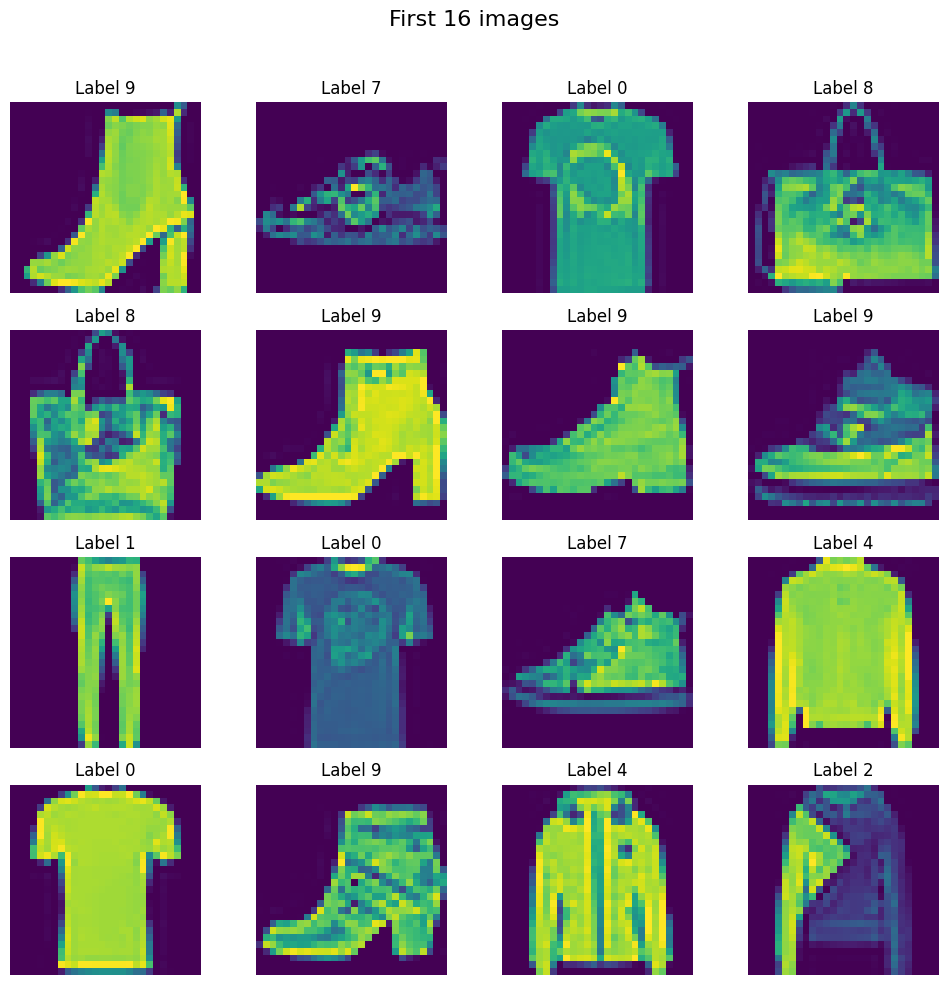

In [6]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle('First 16 images', fontsize=16)

for i,ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f'Label {df.iloc[i,0]}')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [7]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [22]:
# create CustomDataset Class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [23]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [24]:
len(train_dataset)

4800

In [25]:
# create test_datset object
test_dataset = CustomDataset(X_test, y_test)

In [26]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [27]:
# define NN class
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)



In [28]:
# set learning rate and epochs
learning_rate = 0.1
epochs = 100

In [29]:
# instatiate the model
model = MyNN(num_features=X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
# training loop
for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:
    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # clear grad
    optimizer.zero_grad()

    # back pass
    loss.backward()

    # update gradients
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss/len(train_loader)

  print(f"Epoch: {epoch + 1}, Loss: {avg_loss}")

Epoch: 1, Loss: 1.367265865802765
Epoch: 2, Loss: 0.7956147398551305
Epoch: 3, Loss: 0.6754916329185168
Epoch: 4, Loss: 0.5974642556905746
Epoch: 5, Loss: 0.5565257420142492
Epoch: 6, Loss: 0.5118529050548871
Epoch: 7, Loss: 0.48227150479952496
Epoch: 8, Loss: 0.45232052634159725
Epoch: 9, Loss: 0.42147227336963017
Epoch: 10, Loss: 0.4084227299690247
Epoch: 11, Loss: 0.41007134318351746
Epoch: 12, Loss: 0.3640154868364334
Epoch: 13, Loss: 0.35615733241041503
Epoch: 14, Loss: 0.3457483205695947
Epoch: 15, Loss: 0.32675794889529547
Epoch: 16, Loss: 0.31777645766735074
Epoch: 17, Loss: 0.3047041034201781
Epoch: 18, Loss: 0.29512767642736437
Epoch: 19, Loss: 0.28395964632431664
Epoch: 20, Loss: 0.27390812342365584
Epoch: 21, Loss: 0.267691287646691
Epoch: 22, Loss: 0.24789750829339027
Epoch: 23, Loss: 0.2410604186107715
Epoch: 24, Loss: 0.23993778102099894
Epoch: 25, Loss: 0.23750901167591412
Epoch: 26, Loss: 0.2246567726880312
Epoch: 27, Loss: 0.21515182752162218
Epoch: 28, Loss: 0.211001

In [31]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [32]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.845
